## Download the dataset from this [link](https://www.kaggle.com/datasets/lamiatabassum/top-50-us-tech-companies-2022-2023-dataset). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\Top 50 US Tech Companies 2022 - 2023.csv")

#### Find out the dataset dimensions

In [3]:
df.shape

(50, 10)

#### Find out statistical summary of the Dataset

In [4]:
df.describe()

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


#### Check for the null values in Dataset

In [5]:
df.isnull().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

#### Check for the noise value of the dataset

In [6]:
for i in df.columns:
    unique_values = df[i].unique()
    print(f"{i}:\n {unique_values}\n")

Company Name:
 ['Apple Inc.' 'Microsoft Corporation' 'Alphabet (Google)' 'Amazon'
 'NVIDIA Corporation' 'Tesla' 'Meta Platforms' 'Broadcom Inc.'
 'Oracle Corporation' 'Cisco Systems Inc.' 'Salesforce Inc.' 'Adobe Inc.'
 'Texas Instruments Inc.' 'Advanced Micro Devices (AMD) Inc.'
 'Qualcomm Inc.' 'Netflix' 'Intel Corporation' 'Intuit Inc.'
 'IBM Corporation' 'Applied Materials Inc.' 'Booking Holdings'
 'Analog Devices Inc.' 'ServiceNow Inc.' 'Automatic Data Processing'
 'PayPal Holdings Inc.' 'Airbnb' 'Fiserv Inc.' 'Lam Research Corporation'
 'Uber Technologies Inc.' 'Micron Technology' 'Equinix'
 'Activision Blizzard' 'Palo Alto Networks Inc.' 'Synopsys Inc.'
 'Cadence Design Systems Inc.' 'KLA Corporation' 'Arista Networks Inc.'
 'VMware Inc.' 'Workday Inc.' 'Fortinet Inc.' 'Block Inc.'
 'Snowflake Inc.' 'Roper Technologies' 'Microchip Technology Inc.'
 'Autodesk Inc.' 'GlobalFoundries' 'IQVIA Holdings'
 'Marvell Technology Inc.' 'Dell Technologies Inc.' 'HP Inc.']

Industry:
 ['Tech

#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

In [7]:
df.dtypes

Company Name                                         object
Industry                                             object
Sector                                               object
HQ State                                             object
Founding Year                                         int64
Annual Revenue 2022-2023 (USD in Billions)          float64
Market Cap (USD in Trillions)                       float64
Stock Name                                           object
Annual Income Tax in 2022-2023 (USD in Billions)    float64
Employee Size                                         int64
dtype: object

In [8]:
col=["Founding Year","Annual Revenue 2022-2023 (USD in Billions)","Market Cap (USD in Trillions)","Annual Income Tax in 2022-2023 (USD in Billions)","Employee Size"]

In [9]:
for c in col:  
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    print(c,':',df.shape[0]-(df[(df[c]<=upper_limit) & (df[c]>=lower_limit)].shape[0]))

Founding Year : 4
Annual Revenue 2022-2023 (USD in Billions) : 6
Market Cap (USD in Trillions) : 7
Annual Income Tax in 2022-2023 (USD in Billions) : 6
Employee Size : 5


In [10]:
for c in col:  
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(2*iqr)
    lower_limit=percentile25-(2*iqr)
    print(c,':',df.shape[0]-(df[(df[c]<=upper_limit) & (df[c]>=lower_limit)].shape[0]))

Founding Year : 3
Annual Revenue 2022-2023 (USD in Billions) : 5
Market Cap (USD in Trillions) : 7
Annual Income Tax in 2022-2023 (USD in Billions) : 6
Employee Size : 4


In [11]:
df

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


<AxesSubplot:xlabel='Company Name,Industry'>

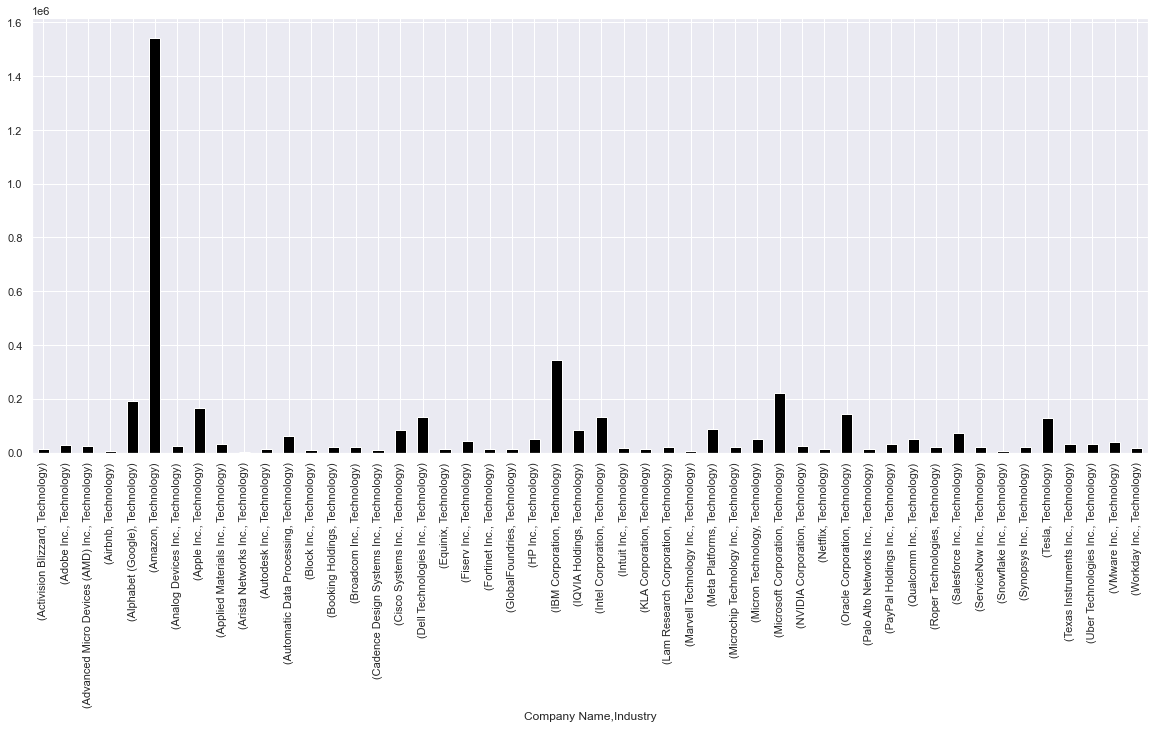

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
df.groupby(["Company Name","Industry"])["Employee Size"].mean().plot(kind="bar",color="black")

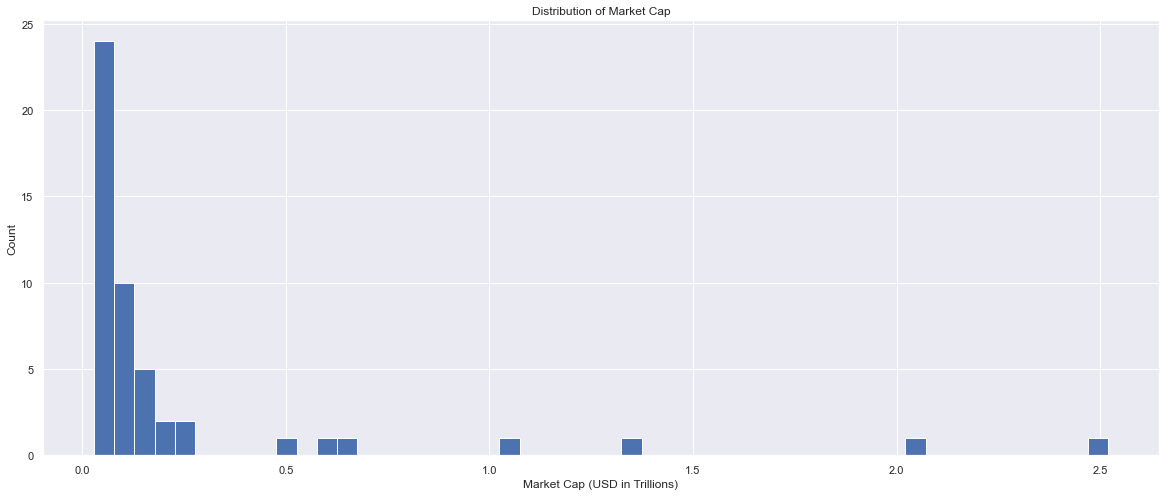

In [16]:
plt.hist(df['Market Cap (USD in Trillions)'], bins=50)
plt.xlabel('Market Cap (USD in Trillions)')
plt.ylabel('Count')
plt.title('Distribution of Market Cap')
plt.show()

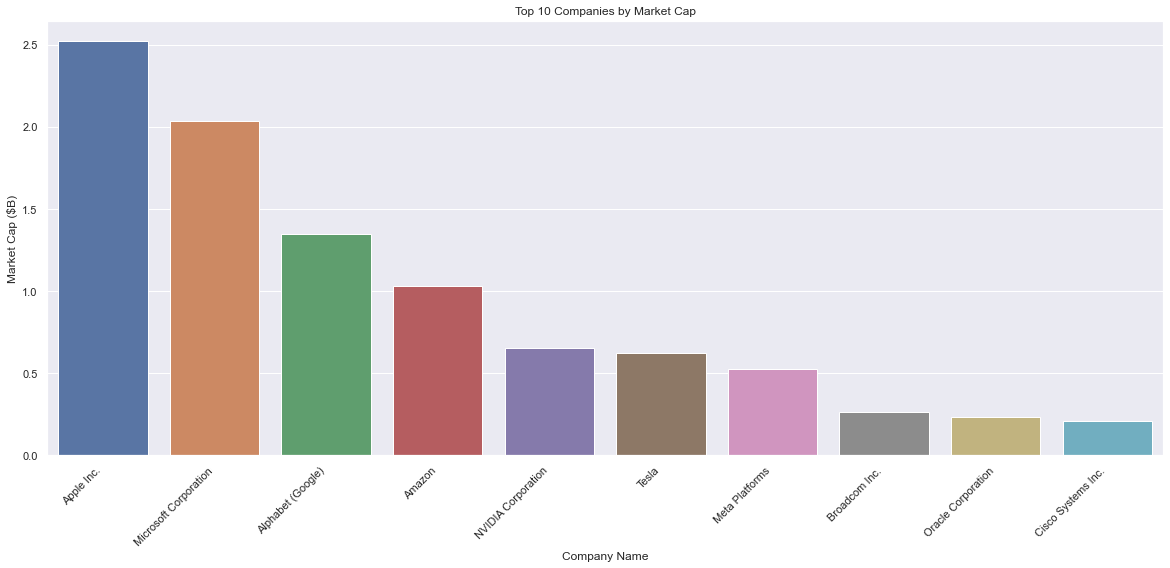

In [19]:
top_10 = df.nlargest(10, 'Market Cap (USD in Trillions)')
sns.barplot(x='Company Name', y='Market Cap (USD in Trillions)', data=top_10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company Name')
plt.ylabel('Market Cap ($B)')
plt.title('Top 10 Companies by Market Cap')
plt.show()

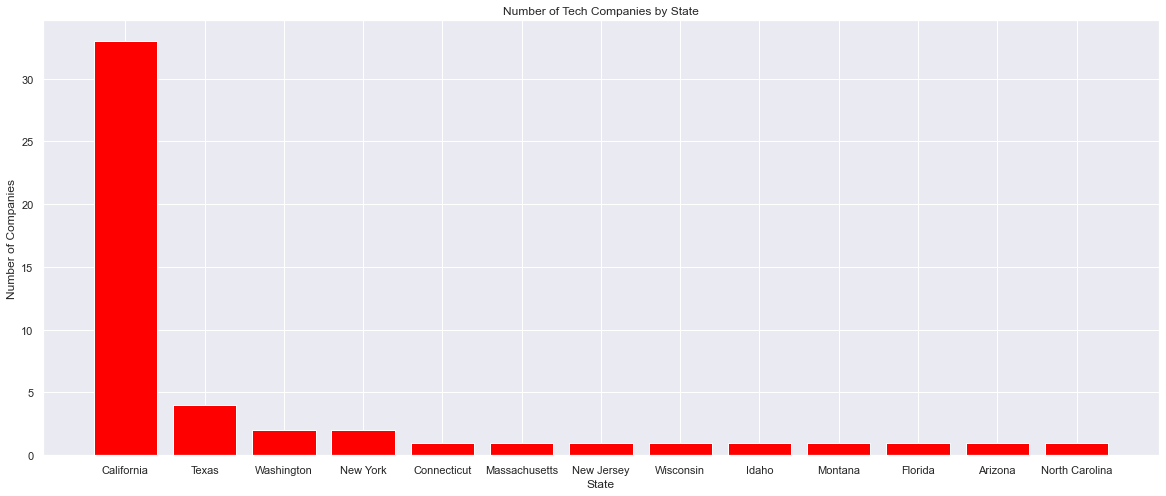

In [21]:
state_counts = df['HQ State'].value_counts()
plt.bar(state_counts.index, state_counts.values,color="red")
plt.title('Number of Tech Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.show()

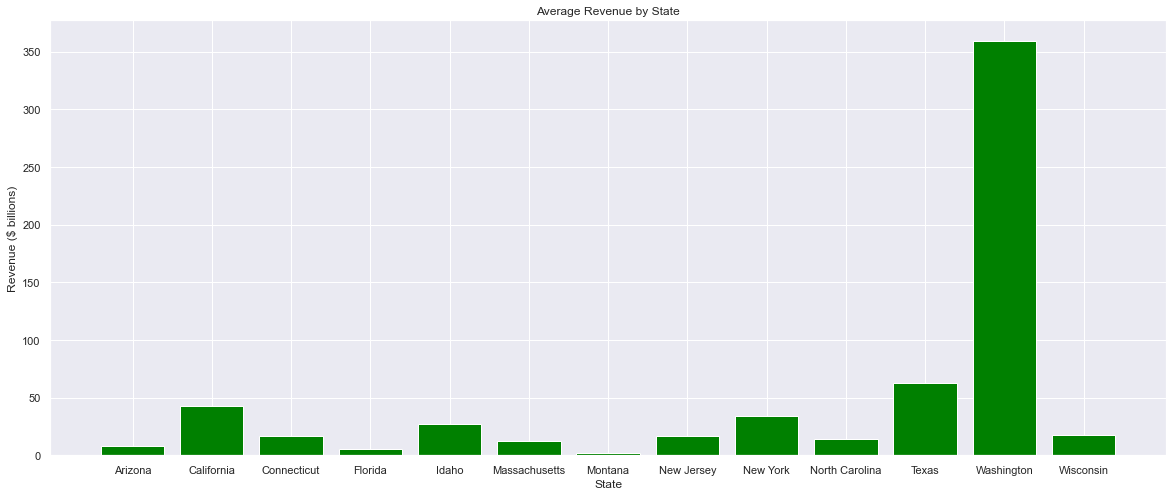

In [28]:
state_revenue = df.groupby('HQ State')['Annual Revenue 2022-2023 (USD in Billions)'].mean()
plt.bar(state_revenue.index, state_revenue.values,color="green")
plt.title('Average Revenue by State')
plt.xlabel('State')
plt.ylabel('Revenue ($ billions)')
plt.show()

In [29]:
df

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


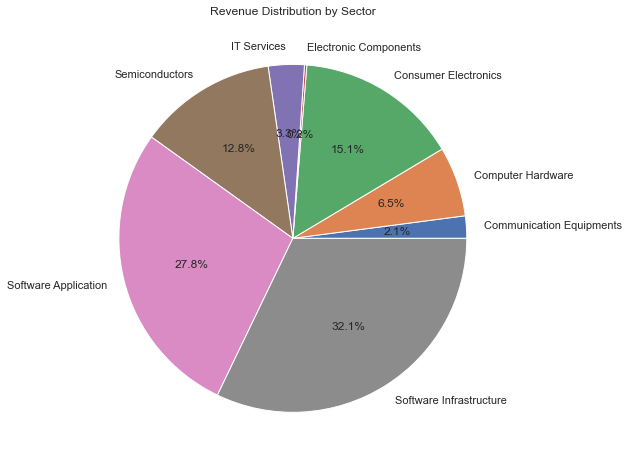

In [31]:
grouped = df.groupby("Sector").sum()
plt.pie(grouped["Annual Revenue 2022-2023 (USD in Billions)"], labels=grouped.index, autopct='%1.1f%%')
plt.title("Revenue Distribution by Sector")
plt.show()

## Add the Cells below and Find out underlying Trends from the dataset 
- Make sure to write your hypothesis and test based on it
- if hypothesis is not correct, explain what could be the reason